<a href="https://colab.research.google.com/github/NinaAbeyratne/Analysing_HCHO_gas_in_Sri_Lanka/blob/main/DE_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Combining the datasets

In [3]:
# Defining column names
column_names = ['HCHO_reading', 'Location', 'current_Date', 'next_Date']

# Reading Data
dataset1 = pd.read_csv('/content/drive/MyDrive/DE CW/Datasets/col_mat_nuw_output.csv', names=column_names)
dataset2 = pd.read_csv('/content/drive/MyDrive/DE CW/Datasets/kan_output.csv', names=column_names)
dataset3 = pd.read_csv('/content/drive/MyDrive/DE CW/Datasets/mon_kur_jaf_output.csv', names=column_names)

In [4]:
dataset1

,HCHO_reading,Location,current_Date,next_Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Nuwara Eliya Proper,2023-12-27,2023-12-28
5474,NaN,Nuwara Eliya Proper,2023-12-28,2023-12-29
5475,NaN,Nuwara Eliya Proper,2023-12-29,2023-12-30
5476,NaN,Nuwara Eliya Proper,2023-12-30,2023-12-31


## Into a dataframe

In [5]:
df_dataset1 = pd.DataFrame(dataset1)
df_dataset2 = pd.DataFrame(dataset2)
df_dataset3 = pd.DataFrame(dataset3)

# Missing Data

In [6]:
# Check for missing data in dataset1
missing_data = df_dataset1.isnull().sum()

# Display columns with missing data
print("Columns with Missing Data in Dataset 1:")
print(missing_data[missing_data > 0])

Columns with Missing Data in Dataset 1:
HCHO_reading    2419
dtype: int64


In [7]:
# Check for missing data in dataset2
missing_data = df_dataset2.isnull().sum()

# Display columns with missing data
print("Columns with Missing Data in Dataset 2:")
print(missing_data[missing_data > 0])

Columns with Missing Data in Dataset 2:
HCHO_reading    793
dtype: int64


In [8]:
# Check for missing data in dataset3
missing_data = df_dataset3.isnull().sum()

# Display columns with missing data
print("Columns with Missing Data in Dataset 3:")
print(missing_data[missing_data > 0])

Columns with Missing Data in Dataset 3:
HCHO_reading    1652
dtype: int64


## Check for Duplicates

In [10]:
# Check for duplicates in dataset1
duplicates = df_dataset1.duplicated().sum()

# Number of duplicate rows
print("Number of Duplicate Rows:", duplicates)

Number of Duplicate Rows: 0


In [11]:
# Check for duplicates in dataset2
duplicates = df_dataset2.duplicated().sum()

# Number of duplicate rows
print("Number of Duplicate Rows:", duplicates)

Number of Duplicate Rows: 0


In [12]:
# Check for duplicates in dataset3
duplicates = df_dataset3.duplicated().sum()

# Number of duplicate rows
print("Number of Duplicate Rows:", duplicates)

Number of Duplicate Rows: 0


# Handling Missing Values

Used forward fill method to handle missing data considering it's more likely to have same levels on following dates

### Dataset 1

In [14]:
# forward fill
df_dataset1.fillna(method='ffill', inplace=True)

In [15]:
# Check for missing data
missing_data = df_dataset1.isnull().sum()

# Display columns with missing data
print("Columns with Missing Data in Dataset 1:")
print(missing_data[missing_data > 0])

Columns with Missing Data in Dataset 1:
Series([], dtype: int64)


In [16]:
# Check for duplicates
duplicates = df_dataset1.duplicated().sum()

# Number of duplicate rows
print("Number of Duplicate Rows:", duplicates)

Number of Duplicate Rows: 0


### Dataset 2 and 3

In [17]:
# forward fill
df_dataset2.fillna(method='ffill', inplace=True)

In [18]:
# forward fill
df_dataset3.fillna(method='ffill', inplace=True)

In [19]:
# Check for missing data
missing_data = df_dataset2.isnull().sum()

# Display columns with missing data
print("Columns with Missing Data in Dataset 2:")
print(missing_data[missing_data > 0])

Columns with Missing Data in Dataset 2:
Series([], dtype: int64)


In [20]:
# Check for missing data
missing_data = df_dataset3.isnull().sum()

# Display columns with missing data
print("Columns with Missing Data in Dataset 3:")
print(missing_data[missing_data > 0])

Columns with Missing Data in Dataset 3:
HCHO_reading    1
dtype: int64


# Combning the datasets

In [21]:
# Combine the datasets
combined_dataset = pd.concat([dataset1, dataset2, dataset3], ignore_index=True)

# Display the combined dataset
combined_dataset

,HCHO_reading,Location,current_Date,next_Date
0,1.969834e-04,Colombo Proper,2019-01-01,2019-01-02
1,2.625522e-04,Colombo Proper,2019-01-02,2019-01-03
2,9.852119e-05,Colombo Proper,2019-01-03,2019-01-04
3,2.099321e-04,Colombo Proper,2019-01-04,2019-01-05
4,1.785337e-04,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
12777,-7.696313e-08,Jaffna Proper,2023-12-27,2023-12-28
12778,5.139770e-05,Jaffna Proper,2023-12-28,2023-12-29
12779,1.267235e-04,Jaffna Proper,2023-12-29,2023-12-30
12780,1.166590e-04,Jaffna Proper,2023-12-30,2023-12-31


In [22]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12782 entries, 0 to 12781
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HCHO_reading  12781 non-null  float64
 1   Location      12782 non-null  object 
 2   current_Date  12782 non-null  object 
 3   next_Date     12782 non-null  object 
dtypes: float64(1), object(3)
memory usage: 399.6+ KB


In [23]:
# Drop the 'next_Date' column
combined_dataset.drop(columns=['next_Date'], inplace=True)

In [24]:
combined_dataset

,HCHO_reading,Location,current_Date
0,1.969834e-04,Colombo Proper,2019-01-01
1,2.625522e-04,Colombo Proper,2019-01-02
2,9.852119e-05,Colombo Proper,2019-01-03
3,2.099321e-04,Colombo Proper,2019-01-04
4,1.785337e-04,Colombo Proper,2019-01-05
...,...,...,...
12777,-7.696313e-08,Jaffna Proper,2023-12-27
12778,5.139770e-05,Jaffna Proper,2023-12-28
12779,1.267235e-04,Jaffna Proper,2023-12-29
12780,1.166590e-04,Jaffna Proper,2023-12-30


# Analysing

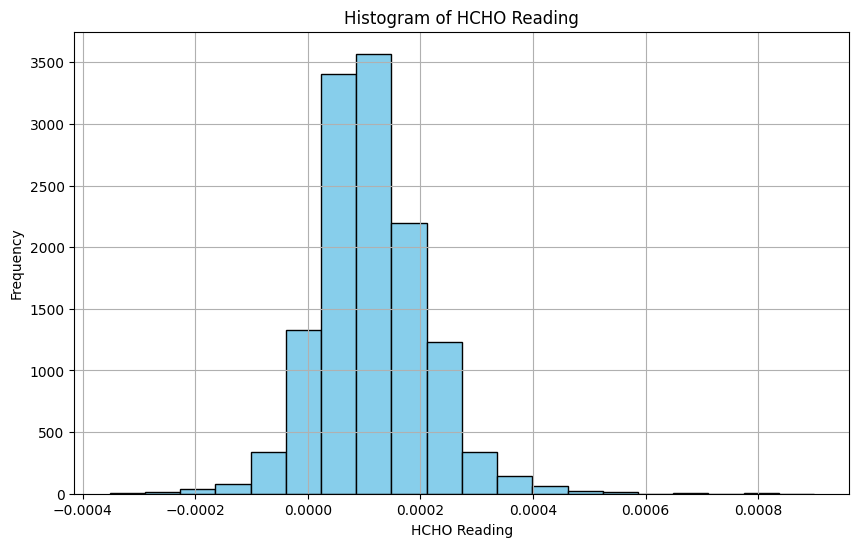

In [25]:
# Visualize the data for the 'HCHO_reading' column
plt.figure(figsize=(10, 6))
plt.hist(combined_dataset['HCHO_reading'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of HCHO Reading')
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

shows a normal distribution therefore the forward fill method is appropriate.

In [26]:
combined_dataset.describe()

,HCHO_reading
count,12781.000000
mean,0.000113
std,0.000096
min,-0.000352
25%,0.000053
50%,0.000107
75%,0.000168
max,0.000900


In [30]:
# Interquartile Range (IQR)
q1 = combined_dataset['HCHO_reading'].quantile(0.25)
q3 = combined_dataset['HCHO_reading'].quantile(0.75)
iqr = q3 - q1
threshold_iqr = 1.5
outliers_iqr = combined_dataset[(combined_dataset['HCHO_reading'] < q1 - threshold_iqr * iqr) | (combined_dataset['HCHO_reading'] > q3 + threshold_iqr * iqr)]


In [31]:
print("Q1 is:", q1)
print("Q3 is:", q3)
print("IQR is:", iqr)
print("Outliers:", outliers_iqr.sum())

Q1 is: 5.301606251927168e-05
Q3 is: 0.0001680550104216
IQR is: 0.0001150389479023283
Outliers: HCHO_reading                                             0.080996
Location        Colombo ProperColombo ProperColombo ProperColo...
current_Date    2019-01-072019-01-192019-01-212019-02-012019-0...
dtype: object


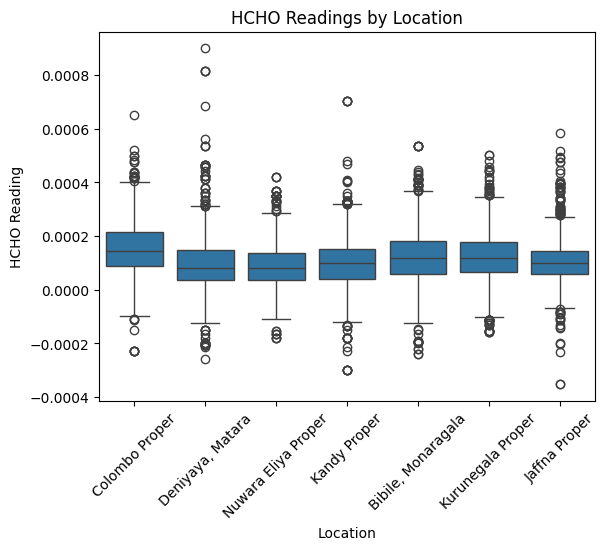

In [32]:
# Box plot of HCHO readings by location
sns.boxplot(x='Location', y='HCHO_reading', data=combined_dataset)
plt.xticks(rotation=45)
plt.title('HCHO Readings by Location')
plt.xlabel('Location')
plt.ylabel('HCHO Reading')
plt.show()

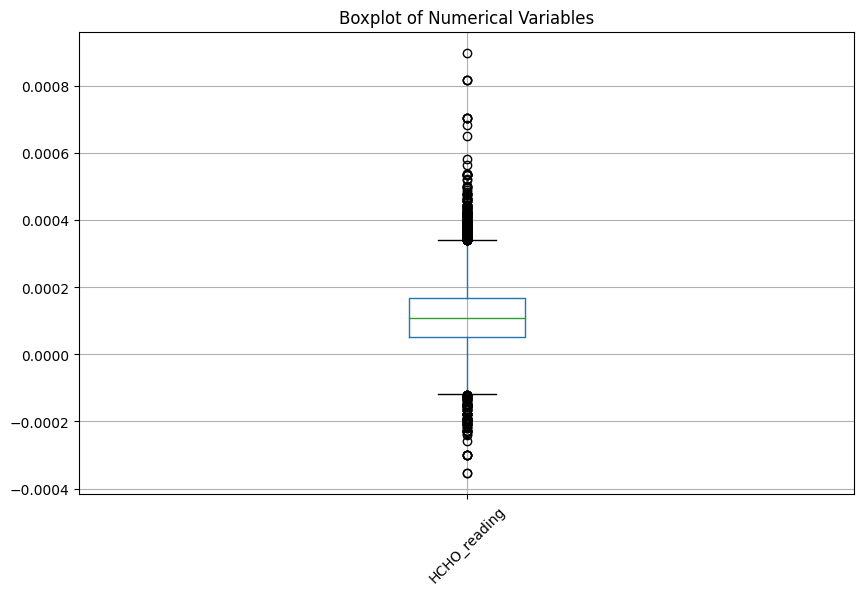

In [33]:
# Boxplot for HCHO reading
plt.figure(figsize=(10, 6))
combined_dataset.boxplot()
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

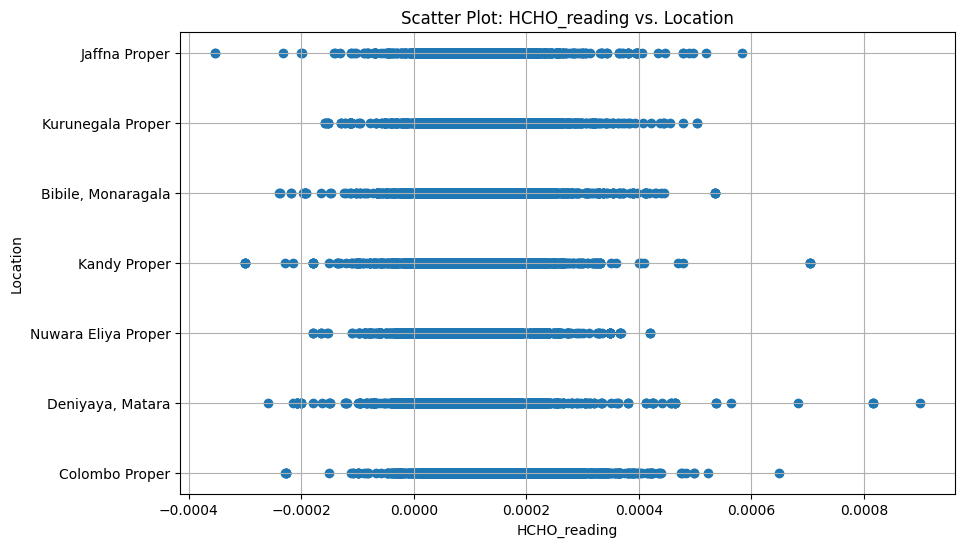

In [34]:
# Scatter plots HCHO_reading vs. Location
plt.figure(figsize=(10, 6))
plt.scatter(combined_dataset['HCHO_reading'], combined_dataset['Location'])
plt.title('Scatter Plot: HCHO_reading vs. Location')
plt.xlabel('HCHO_reading')
plt.ylabel('Location')
plt.grid(True)
plt.show()

In [35]:
# Group data by 'Location'
grouped = combined_dataset.groupby('Location')

# Calculate mean, median
mean = grouped['HCHO_reading'].mean()
median = grouped['HCHO_reading'].median()

# Calculate mode
mode = grouped['HCHO_reading'].agg(lambda x: x.mode().tolist())

# Combine all statistics into one DataFrame
statistics = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Mode': mode
})

# Print the statistics for each city
print(statistics)

                         Mean    Median                      Mode
Location                                                         
Bibile, Monaragala   0.000121  0.000120  [5.3503339371218606e-05]
Colombo Proper       0.000154  0.000145      [0.0001238353213788]
Deniyaya, Matara     0.000095  0.000082  [-4.738957201891463e-06]
Jaffna Proper        0.000107  0.000099   [-6.91114370543075e-05]
Kandy Proper         0.000100  0.000100    [5.83354944518255e-05]
Kurunegala Proper    0.000124  0.000118     [-0.0001122587561392]
Nuwara Eliya Proper  0.000092  0.000083      [0.0002315311270719]


The mode is handled with an aggregation function because there might be more than one modal value per group.

USed lambda function to ensure the mode is returned as a list (if there's more than one mode).

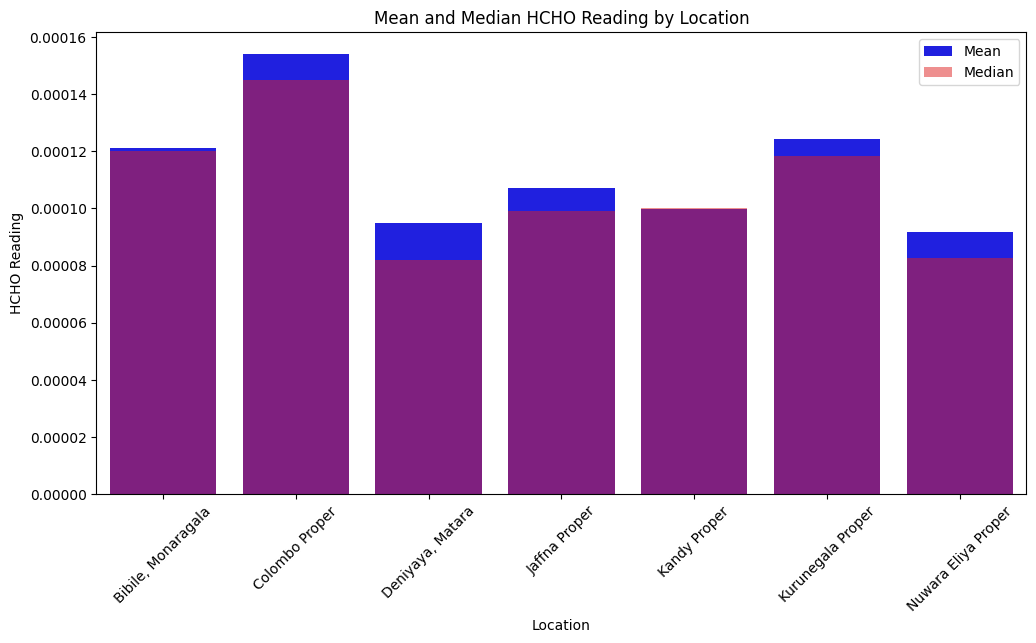

In [36]:
# Visualizing
# statistics.reset_index(inplace=True)

plt.figure(figsize=(12, 6))

# Mean
sns.barplot(x='Location', y='Mean', data=statistics, color='blue', label='Mean')
# Median
sns.barplot(x='Location', y='Median', data=statistics, color='red', alpha=0.5, label='Median')

plt.title('Mean and Median HCHO Reading by Location')
plt.xlabel('Location')
plt.ylabel('HCHO Reading')
plt.xticks(rotation=45)
plt.legend()
plt.show()


alsmost all the times Mean values > Median values

In [37]:
overall_mean = combined_dataset['HCHO_reading'].mean()
overall_median = combined_dataset['HCHO_reading'].median()

overall_stats = pd.DataFrame({
    'Statistic': ['Mean', 'Median'],
    'Value': [overall_mean, overall_median]
})

print("Overall Mean:", overall_mean)
print("Overall Median:", overall_median)

Overall Mean: 0.00011331592738974339
Overall Median: 0.0001070883098265


<ipython-input-38-9e61a854346f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Statistic', y='Value', data=overall_stats, palette=['blue', 'red'])


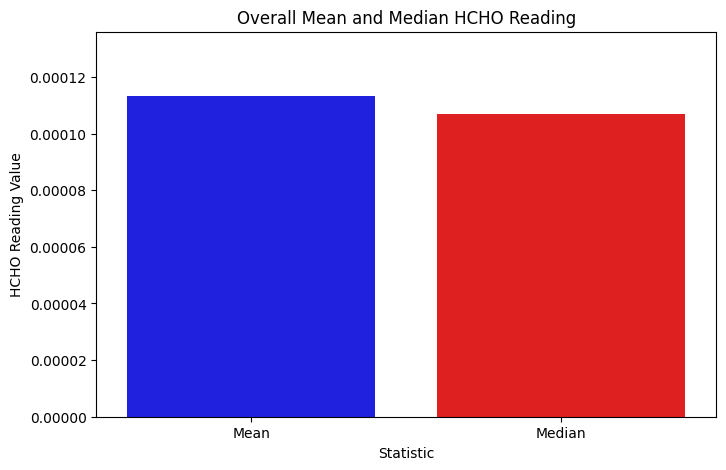

In [38]:
plt.figure(figsize=(8, 5))

# Creating a barplot for overall mean and median
sns.barplot(x='Statistic', y='Value', data=overall_stats, palette=['blue', 'red'])

plt.title('Overall Mean and Median HCHO Reading')
plt.xlabel('Statistic')
plt.ylabel('HCHO Reading Value')
# plt.ylim(0, overall_stats['Value'].max() + 1)
plt.ylim(0, max(overall_mean, overall_median) * 1.2)  # 20% higher than the max value
plt.show()


# Additional Features

In [40]:
additional_data = pd.DataFrame({
    'Location': ['Bibile, Monaragala', 'Colombo Proper', 'Deniyaya, Matara', 'Jaffna Proper', 'Kandy Proper', 'Kurunegala Proper', 'Nuwara Eliya Proper'],
    'Precipitation (inches)': [-94.37, 4.27, -72.38, 14.97, -82.5, -53.91, -72.4],
    'Population (2011 census)': ['752,993', '809,344', '27,500', '38,386', '1,610,299', '88,138', '125,400'],
    'Altitude (m)': [3, 200, 1868, 175, 116, 10, 500]
})

# Merge all the additional data with the existing DataFrame on the 'Location' column
df_merged = pd.merge(combined_dataset, additional_data, on='Location', how='left')

df_merged

,HCHO_reading,Location,current_Date,Precipitation (inches),Population (2011 census),Altitude (m)
0,1.969834e-04,Colombo Proper,2019-01-01,4.27,"809,344",200
1,2.625522e-04,Colombo Proper,2019-01-02,4.27,"809,344",200
2,9.852119e-05,Colombo Proper,2019-01-03,4.27,"809,344",200
3,2.099321e-04,Colombo Proper,2019-01-04,4.27,"809,344",200
4,1.785337e-04,Colombo Proper,2019-01-05,4.27,"809,344",200
...,...,...,...,...,...,...
12777,-7.696313e-08,Jaffna Proper,2023-12-27,14.97,"38,386",175
12778,5.139770e-05,Jaffna Proper,2023-12-28,14.97,"38,386",175
12779,1.267235e-04,Jaffna Proper,2023-12-29,14.97,"38,386",175
12780,1.166590e-04,Jaffna Proper,2023-12-30,14.97,"38,386",175


In [41]:
df_merged.describe()

,HCHO_reading,Precipitation (inches),Altitude (m)
count,12781.000000,12782.000000,12782.000000
mean,0.000113,-50.902857,410.285714
std,0.000096,40.007792,614.756676
min,-0.000352,-94.370000,3.000000
25%,0.000053,-82.500000,10.000000
50%,0.000107,-72.380000,175.000000
75%,0.000168,4.270000,500.000000
max,0.000900,14.970000,1868.000000


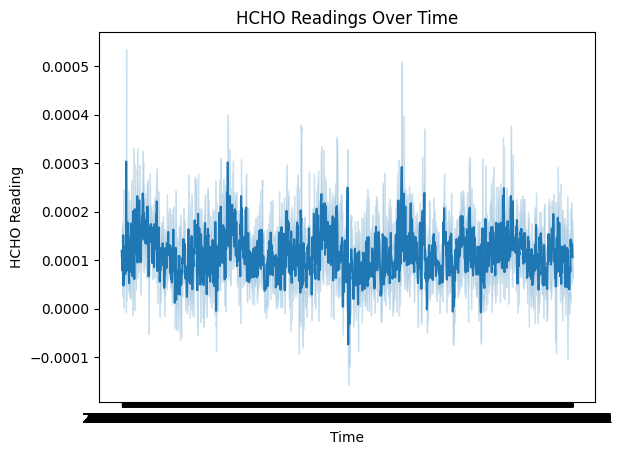

In [42]:
# Line plot of HCHO readings over time
sns.lineplot(x='current_Date', y='HCHO_reading', data=df_merged)
plt.title('HCHO Readings Over Time')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.show()

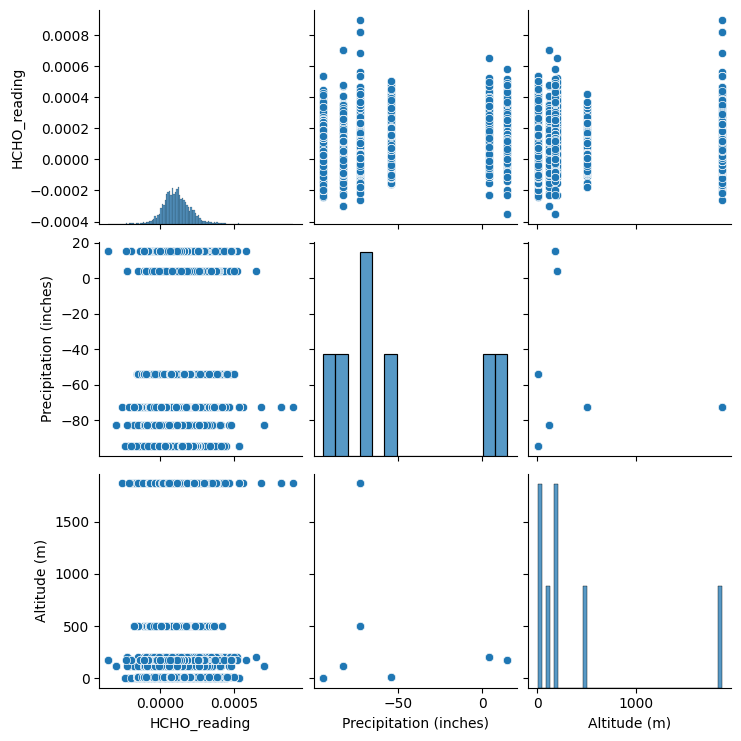

In [43]:
# Scatter plot of HCHO readings vs. precipitation, population, and altitude
sns.pairplot(df_merged[['HCHO_reading', 'Precipitation (inches)', 'Population (2011 census)', 'Altitude (m)']])
plt.show()

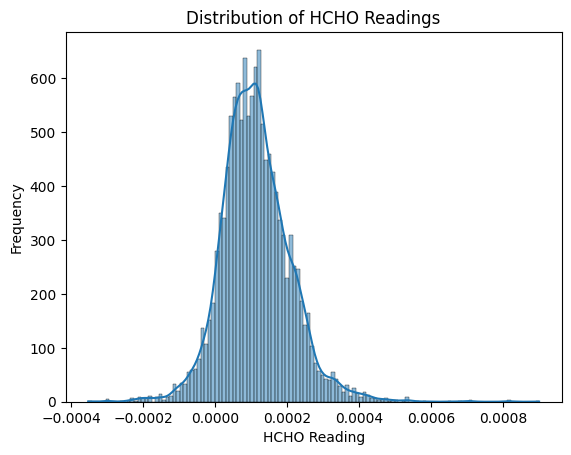

In [44]:
# Histograms and density plots
sns.histplot(df_merged['HCHO_reading'], kde=True)
plt.title('Distribution of HCHO Readings')
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.show()

In [45]:
# Remove non-numeric characters and convert to numeric
df_merged['Population (2011 census)'] = df_merged['Population (2011 census)'].str.replace(',', '').astype(float)

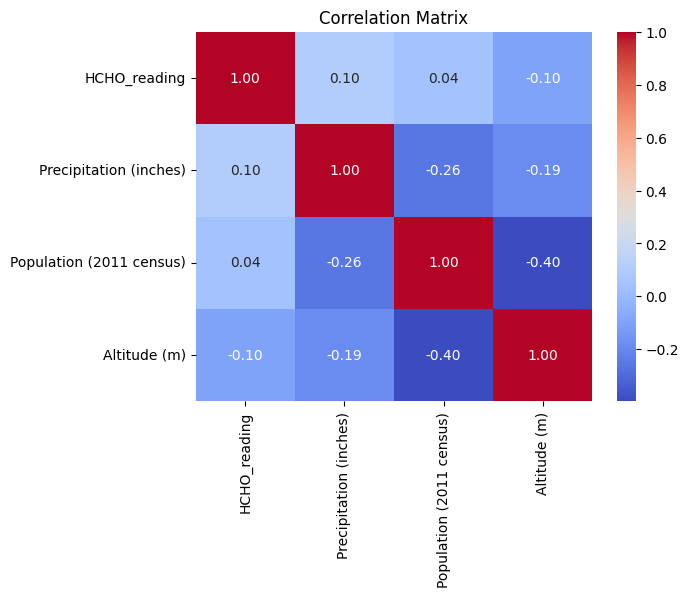

In [46]:
# Heatmap of correlation matrix
corr_matrix = df_merged[['HCHO_reading', 'Precipitation (inches)', 'Population (2011 census)', 'Altitude (m)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()